In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
from citipy import citipy

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
    

635

In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=163f186b130ef1b2ab58ec34b959f3d3


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kihurio
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | husavik
Processing Record 5 of Set 1 | mamallapuram
Processing Record 6 of Set 1 | jalu
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | dabrowa tarnowska
Processing Record 10 of Set 1 | karratha
Processing Record 11 of Set 1 | mount pleasant
Processing Record 12 of Set 1 | birjand
Processing Record 13 of Set 1 | fenoarivo atsinanana
Processing Record 14 of Set 1 | gidam
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | jabiru
City not found. Skipping...
Processing Record 17 of Set 1 | vagur
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | aporawan
City not found. Skipping...
Processing Record 20 of Set 1 | vaasa
Processing Record 21 of Set 1 | rikitea
Processing 

KeyboardInterrupt: 

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [ ]:
city_data_df = city_data_df[new_column_order]

In [ ]:
city_data_df.head(10)

In [ ]:
# Create the output file (CSV).
#output_data_file = "weather_data/cities2.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lat = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.(6.3.1)
plt.scatter(lat,
            max_temps,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
#plt.ylim(40,110)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. Humidity.(6.3.2)
plt.scatter(lat,
            humidity,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
#plt.ylim(40,110)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.(6.3.3)
plt.scatter(lat, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
#Save the figure
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show

In [ ]:
# Build the scatter plots for latitude vs. wind speed.(6.3.4)
plt.scatter(lat, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
#Save the figure
plt.savefig("weather_data/Fig4.png")
#Show plot
plt.show

In [ ]:
# Perform linear regression.(6.4.2) -  Scatter plot + LinRegress Formula
#(slope, interecept, r_value, p_vaalue, std_err) = linregress(x_values,y_values)

# Calculate the regression line "y values" from the slope and intercept.
#regress_values = x_values * slope + intercept

# Get the equation of the line.
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
#plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
#plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
#plt.annotate(line_eq, (10,40), fontsize=15, color="red")
#plt.title(title)
#plt.xlabel('Latitude')
#plt.ylabel('Temp')
#plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
#6.4.2
weather_data_df = pd.read_csv("weather_data/cities.csv")

In [21]:
index13 = weather_data_df.loc[13]
index13

City_ID                        13
City                     Victoria
Country                        HK
Date          2022-01-25 01:24:00
Lat                       22.2855
Lng                      114.1577
Max Temp                    68.18
Humidity                       90
Cloudiness                     99
Wind Speed                   1.99
Name: 13, dtype: object

In [22]:
weather_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
544     True
545    False
546     True
547    False
548     True
Name: Lat, Length: 549, dtype: bool

In [23]:
weather_data_df.loc[(weather_data_df["Lat"]>= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hobyo,SO,2022-01-25 01:28:51,5.3505,48.5268,75.72,71,19,22.28
1,1,Albany,US,2022-01-25 01:28:02,42.6001,-73.9662,27.09,70,100,2.59
2,2,Wanning,CN,2022-01-25 01:28:51,18.8003,110.3967,74.21,84,29,4.07
5,5,Faya,SA,2022-01-25 01:28:52,18.3851,42.4509,48.31,54,0,0.43
8,8,Altoona,US,2022-01-25 01:28:53,40.5187,-78.3947,30.45,92,100,3.24


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = weather_data_df.loc[(weather_data_df["Lat"]>= 0)]
southern_hemi_df = weather_data_df.loc[(weather_data_df["Lat"]< 0)]

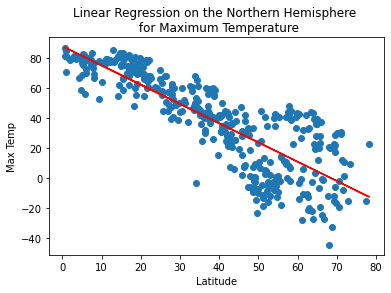

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function(\n)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(-40,-20))

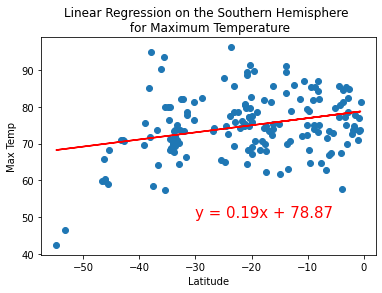

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature','Max Temp',(-30,50))

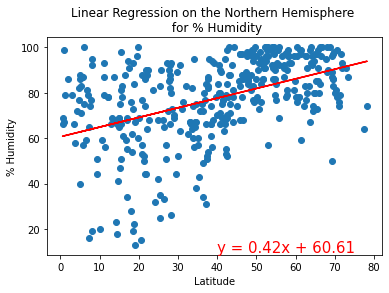

In [29]:
# Linear regression on the Northern Hemisphere(6.4.3)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

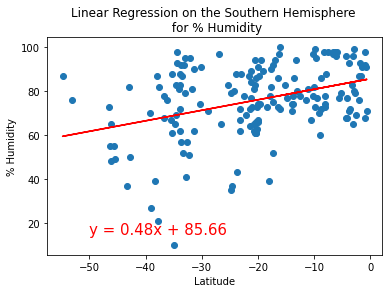

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

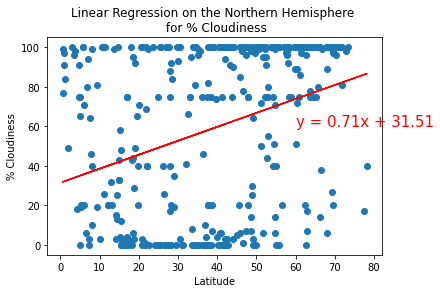

In [31]:
# Linear regression on the Northern Hemisphere on Cloudiness(6.4.4)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(60,60))

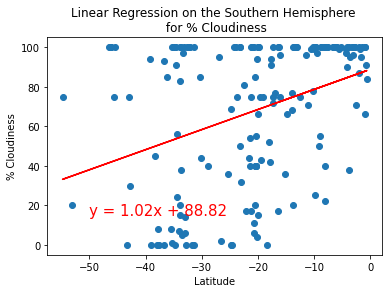

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

In [33]:
linregress((southern_hemi_df["Lat"]),(southern_hemi_df["Cloudiness"]))

LinregressResult(slope=1.0157343968870696, intercept=88.82360409074991, rvalue=0.36193823874066816, pvalue=1.4306615366962623e-06, stderr=0.2030494011286698, intercept_stderr=4.943030648404047)

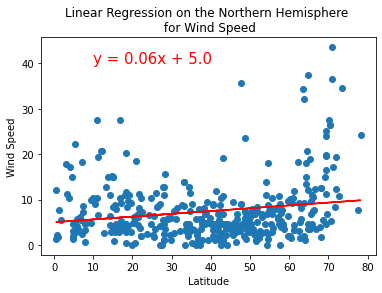

In [34]:
# Linear regression on the Northern Hemisphere(6.4.5) Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,40))

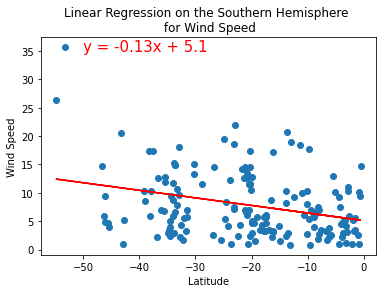

In [35]:
# Linear regression on the Southern Hemisphere - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))